In [60]:
from numpy import array
import numpy as np
from keras.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
import tensorflow as tf
from matplotlib import pyplot as plt

In [46]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
		
	return array(X), array(y)

In [47]:
# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]

# choose a number of time steps
n_steps = 3

# n_features = 1
n_features = 1


In [48]:
# split into samples
X, y = split_sequence(raw_seq, n_steps)

y = array([
    [40, 41, 42],
    [50, 51, 52],
    [60, 61, 63],
    [70, 70, 70], 
    [80, 80, 80],
    [90, 90, 90]
])
X = array([
    [10, 20, 30],
    [20, 30, 40],
    [30, 40, 50],
    [40, 50, 60],
    [50, 60, 70],
    [60, 70, 80]
])

In [49]:
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[10 20 30] [40 41 42]
[20 30 40] [50 51 52]
[30 40 50] [60 61 63]
[40 50 60] [70 70 70]
[50 60 70] [80 80 80]
[60 70 80] [90 90 90]


In [50]:
# reshape from [samples, timesteps] into [samples, timesteps, features]

X = X.reshape((X.shape[0], X.shape[1], 1))
y = y.reshape(y.shape[0], y.shape[1], 1)
pass

In [76]:
# define model
model = Sequential()
model.add(Input((800,800)))
model.add(LSTM(800, activation='relu', return_sequences=True, input_shape=(800, 800)))

model.compile(optimizer='adam', loss=mean_squared_error)

In [55]:
# fit model

hist = model.fit(X, y, epochs=200, verbose=1)


Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 4565.2832
Epoch 2/200
1/1 [==============================] - 0s 80ms/step - loss: 4316.7261
Epoch 3/200
1/1 [==============================] - 0s 76ms/step - loss: 3891.8770
Epoch 4/200
1/1 [==============================] - 0s 83ms/step - loss: 3004.0881
Epoch 5/200
1/1 [==============================] - 0s 82ms/step - loss: 1600.4542
Epoch 6/200
1/1 [==============================] - 0s 80ms/step - loss: 532.8986
Epoch 7/200
1/1 [==============================] - 0s 78ms/step - loss: 1845.0133
Epoch 8/200
1/1 [==============================] - 0s 77ms/step - loss: 1152.1769
Epoch 9/200
1/1 [==============================] - 0s 78ms/step - loss: 450.9842
Epoch 10/200
1/1 [==============================] - 0s 75ms/step - loss: 409.4553
Epoch 11/200
1/1 [==============================] - 0s 77ms/step - loss: 626.5482
Epoch 12/200
1/1 [==============================] - 0s 77ms/step - loss: 799.2526
Epoch 13/200
1/1 [==

[[100.74754 100.64604 100.87234]]


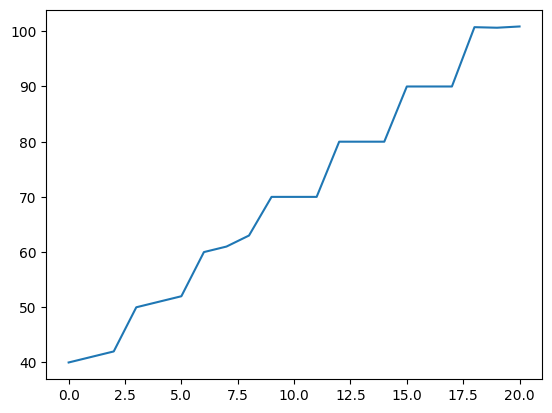

In [56]:
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

y_predict = np.append(y,[yhat])

plt.plot(y_predict)

# plt.plot(x_show, label='line 1')
# plt.legend()
# plt.show()
print(yhat)